# Wicklow isolates Pathogenie vs JC pipeline results

In [97]:
import sys,os,shutil,subprocess
import glob
from importlib import reload
import numpy as np
import pandas as pd
pd.set_option('display.width', 200)
import pylab as plt
import matplotlib as mpl
from Bio import SeqIO
sys.path.append('pathogenie')
from pathogenie import tools, aligners, app, trees

In [ ]:
meta = pd.read_csv('/storage/btbgenie/JoeROIData/Mbovis/sampleInformation_NoAnimalIDs_18-12-19.csv')
meta

## Run workflow 

In [140]:
reload(app)
reload(trees)
args = {'threads':8, 'outdir': '../wicklow_results', 'labelsep':'_',
        'input':['/storage/btbgenie/JoeROIData/Mbovis/Wicklow/Fastqs_07-01-18/',
                 '/storage/btbgenie/JoeROIData/Mbovis/Wicklow/Fastqs_15-03-19/',
                 '/storage/btbgenie/JoeROIData/Mbovis/Wicklow/Fastqs_09-07-18/'],
        'reference': None, 'overwrite':False}
W = app.WorkFlow(**args)
st = W.setup()
W.run()

threads 8
outdir ../wicklow_results
labelsep _
input ['/storage/btbgenie/JoeROIData/Mbovis/Wicklow/Fastqs_07-01-18/', '/storage/btbgenie/JoeROIData/Mbovis/Wicklow/Fastqs_15-03-19/', '/storage/btbgenie/JoeROIData/Mbovis/Wicklow/Fastqs_09-07-18/']
reference None
overwrite False
quality 25
47 samples were loaded:
-------------
                           name     sample                                           filename  pair  read_length
0    13-11594_S85_L001-4_R1_001   13-11594  /storage/btbgenie/JoeROIData/Mbovis/Wicklow/Fa...     1          149
1    13-11594_S85_L001-4_R2_001   13-11594  /storage/btbgenie/JoeROIData/Mbovis/Wicklow/Fa...     2          149
2   14-MBovis_S21_L001-4_R1_001  14-MBovis  /storage/btbgenie/JoeROIData/Mbovis/Wicklow/Fa...     1          148
3   14-MBovis_S21_L001-4_R2_001  14-MBovis  /storage/btbgenie/JoeROIData/Mbovis/Wicklow/Fa...     2          148
4    15-11643_S67_L001-4_R1_001   15-11643  /storage/btbgenie/JoeROIData/Mbovis/Wicklow/Fa...     1          

## Compare sites matrix

Text(0.5, 1.0, 'SNP site overlap')

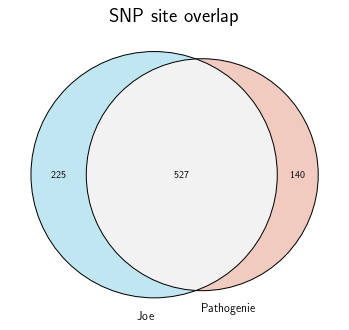

In [146]:
smat = pd.read_csv('../wicklow_results/snp_matrix.txt',sep=' ',index_col=0)
smat.index
joe_sites = pd.read_csv('/storage/btbgenie/JoeROIData/Mbovis/Wicklow/FASTA/fastaPositions_Prox-10_18-12-2019.txt')
#print (joe_sites)
plt.figure(figsize=(6,6))
import matplotlib_venn
mpl.rc('text', usetex=True)
sets=[set(joe_sites.Position),set(smat.index)]
matplotlib_venn.venn2(sets,set_labels=['Joe','Pathogenie'],set_colors=['#62C4DE','#DE7C62'])
ax=matplotlib_venn.venn2_circles(sets,linewidth=1)
plt.title('SNP site overlap',fontsize=20)

In [149]:
#print(W.fastq_table)
meta['name'] = meta.Forward.apply(lambda x: x.split('.')[0])
#print(meta)

s = pd.merge(W.fastq_table,meta,on='name')
labelmap = dict(zip(s.bam_file,s.Species))
#print (labelmap)


In [ ]:
reload(trees)
t = trees.create_tree('../wicklow_results/RAxML_bipartitions.variants', ref='ref',labelmap=labelmap)
t.render("%%inline")

## Compare trees

In [ ]:
reload(trees)
t = trees.create_tree('/storage/btbgenie/JoeROIData/Mbovis/Wicklow/mlTree_WICKLOW_18-12-2019.tree')#, labelmap)
t.render("%%inline")